In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt

# suppress warning
import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf

import pandas_datareader.data as pdr
import yfinance as yf

In [2]:
data=pd.read_csv("all_data.csv")
data

,callsign,typecode,origin,destination,firstseen,lastseen,day
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00
1,AEA040,A332,LEMD,LEMD,2018-12-31 01:07:21+00:00,2019-01-01 03:32:59+00:00,2019-01-01 00:00:00+00:00
2,CXA825,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2019-01-01 00:00:00+00:00
3,CLU211,B744,UUEE,EDDF,2018-12-31 01:49:28+00:00,2019-01-01 04:11:38+00:00,2019-01-01 00:00:00+00:00
4,ETH704,B788,KLDJ,LFPG,2018-12-31 03:31:48+00:00,2019-01-01 04:30:10+00:00,2019-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...
42424537,N749SF,B407,K1H0,MO35,2022-12-31 23:38:12+00:00,2022-12-31 23:57:10+00:00,2022-12-31 00:00:00+00:00
42424538,SDA289,C208,NZWN,NZWB,2022-12-31 23:42:19+00:00,2022-12-31 23:57:29+00:00,2022-12-31 00:00:00+00:00
42424539,N988NW,FA7X,KPBI,KFLL,2022-12-31 23:42:27+00:00,2022-12-31 23:57:27+00:00,2022-12-31 00:00:00+00:00
42424540,N835CS,EC35,MS90,K08M,2022-12-31 23:44:12+00:00,2022-12-31 23:58:55+00:00,2022-12-31 00:00:00+00:00


In [3]:
icao=pd.read_csv("iata-icao.csv")
icao

,country_code,region_name,iata,icao,airport,latitude,longitude
0,AE,Abu Zaby,AAN,OMAL,Al Ain International Airport,24.2617,55.6092
1,AE,Abu Zaby,AUH,OMAA,Abu Dhabi International Airport,24.4330,54.6511
2,AE,Abu Zaby,AYM,NaN,Yas Island Seaplane Base,24.4670,54.6103
3,AE,Abu Zaby,AZI,OMAD,Al Bateen Executive Airport,24.4283,54.4581
4,AE,Abu Zaby,DHF,OMAM,Al Dhafra Air Base,24.2482,54.5477
...,...,...,...,...,...,...,...
8932,ZW,Masvingo,MVZ,FVMV,Masvingo Airport,-20.0553,30.8591
8933,ZW,Matabeleland North,HWN,FVWN,Hwange National Park Airport,-18.6299,27.0210
8934,ZW,Matabeleland North,VFA,FVFA,Victoria Falls Airport,-18.0959,25.8390
8935,ZW,Matabeleland North,WKI,FVWT,Hwange Town Airport,-18.3630,26.5198


In [4]:
uniqO = data['origin'].unique()
uniqO_df = pd.DataFrame(uniqO)
uniqO_df

,0
0,YSSY
1,LEMD
2,UUEE
3,KLDJ
4,WIII
...,...
15273,RJSF
15274,LERI
15275,SC19
15276,45WY


In [5]:
duniqO = icao['icao'].unique()
duniqO_df = pd.DataFrame(duniqO)
duniqO_df

,0
0,OMAL
1,OMAA
2,NaN
3,OMAD
4,OMAM
...,...
7787,FVMV
7788,FVWN
7789,FVFA
7790,FVWT


In [6]:
# Filter the DataFrame
filter_major_planetype = data[data['typecode'].str.startswith(('A3', 'B7', 'E1','DH','CRJ'))]

# Print the filtered DataFrame
filter_major_planetype

,callsign,typecode,origin,destination,firstseen,lastseen,day
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00
1,AEA040,A332,LEMD,LEMD,2018-12-31 01:07:21+00:00,2019-01-01 03:32:59+00:00,2019-01-01 00:00:00+00:00
2,CXA825,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2019-01-01 00:00:00+00:00
3,CLU211,B744,UUEE,EDDF,2018-12-31 01:49:28+00:00,2019-01-01 04:11:38+00:00,2019-01-01 00:00:00+00:00
4,ETH704,B788,KLDJ,LFPG,2018-12-31 03:31:48+00:00,2019-01-01 04:30:10+00:00,2019-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...
42424528,ENY3800,E145,KORD,KCMI,2022-12-31 23:30:50+00:00,2022-12-31 23:56:58+00:00,2022-12-31 00:00:00+00:00
42424530,CFHAJ,DH3T,CYVR,CYVR,2022-12-31 23:32:33+00:00,2022-12-31 23:52:52+00:00,2022-12-31 00:00:00+00:00
42424531,VTE565,E145,KMQY,KBNA,2022-12-31 23:34:30+00:00,2022-12-31 23:47:15+00:00,2022-12-31 00:00:00+00:00
42424534,CFPCG,DHC2,2WA3,CYVR,2022-12-31 23:36:52+00:00,2022-12-31 23:50:34+00:00,2022-12-31 00:00:00+00:00


In [7]:
# Filter the DataFrame to include only rows where the callsign starts with three letters
filtered_df = filter_major_planetype[filter_major_planetype['callsign'].str.match(r'^[A-Z]{3}')]
# This regex: ^[A-Z]{3} ensures the string starts (^) with exactly three capital letters ([A-Z]{3})
filtered_com_major = filtered_df[~filtered_df['callsign'].str.match(r'^[A-Z]+$')]
# This regex: ^[A-Z]+$ matches strings that start and end with one or more capital letters


filtered_com_major

,callsign,typecode,origin,destination,firstseen,lastseen,day
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00
1,AEA040,A332,LEMD,LEMD,2018-12-31 01:07:21+00:00,2019-01-01 03:32:59+00:00,2019-01-01 00:00:00+00:00
2,CXA825,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2019-01-01 00:00:00+00:00
3,CLU211,B744,UUEE,EDDF,2018-12-31 01:49:28+00:00,2019-01-01 04:11:38+00:00,2019-01-01 00:00:00+00:00
4,ETH704,B788,KLDJ,LFPG,2018-12-31 03:31:48+00:00,2019-01-01 04:30:10+00:00,2019-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...
42424525,PDT6131,E145,KMDT,KPHL,2022-12-31 23:29:15+00:00,2022-12-31 23:50:46+00:00,2022-12-31 00:00:00+00:00
42424527,JZA319,DH8D,CYQQ,CYVR,2022-12-31 23:30:43+00:00,2022-12-31 23:51:42+00:00,2022-12-31 00:00:00+00:00
42424528,ENY3800,E145,KORD,KCMI,2022-12-31 23:30:50+00:00,2022-12-31 23:56:58+00:00,2022-12-31 00:00:00+00:00
42424531,VTE565,E145,KMQY,KBNA,2022-12-31 23:34:30+00:00,2022-12-31 23:47:15+00:00,2022-12-31 00:00:00+00:00


In [8]:
unique_typecodes = filtered_com_major['typecode'].unique()

# Create a dictionary with all values under one key
PlaneTypes = {'Typecode': list(unique_typecodes)}

# Convert the dictionary to a DataFrame
PlaneTypes_df = pd.DataFrame(PlaneTypes)

# Display the DataFrame
PlaneTypes_df = PlaneTypes_df.sort_values(by='Typecode')
PlaneTypes_df


,Typecode
35,A306
59,A30B
15,A310
42,A318
20,A319
...,...
29,E145
30,E170
72,E175
27,E190


In [9]:
uniqO = filtered_com_major['origin'].unique()
uniqO_df = pd.DataFrame(uniqO)
uniqO_df

,0
0,YSSY
1,LEMD
2,UUEE
3,KLDJ
4,WIII
...,...
5753,EG03
5754,KSTK
5755,LGLR
5756,KSFQ


In [10]:
uniqD = filtered_com_major['destination'].unique()
uniqD_df = pd.DataFrame(uniqD)
uniqD_df

,0
0,EDDF
1,LEMD
2,LFPG
3,RPLL
4,KLAX
...,...
10755,4WI9
10756,LSZC
10757,KAKO
10758,ORUQ


In [11]:
filtered_com_major['day'] = pd.to_datetime(filtered_com_major['day'])
filtered_com_major

,callsign,typecode,origin,destination,firstseen,lastseen,day
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00
1,AEA040,A332,LEMD,LEMD,2018-12-31 01:07:21+00:00,2019-01-01 03:32:59+00:00,2019-01-01 00:00:00+00:00
2,CXA825,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2019-01-01 00:00:00+00:00
3,CLU211,B744,UUEE,EDDF,2018-12-31 01:49:28+00:00,2019-01-01 04:11:38+00:00,2019-01-01 00:00:00+00:00
4,ETH704,B788,KLDJ,LFPG,2018-12-31 03:31:48+00:00,2019-01-01 04:30:10+00:00,2019-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...
42424525,PDT6131,E145,KMDT,KPHL,2022-12-31 23:29:15+00:00,2022-12-31 23:50:46+00:00,2022-12-31 00:00:00+00:00
42424527,JZA319,DH8D,CYQQ,CYVR,2022-12-31 23:30:43+00:00,2022-12-31 23:51:42+00:00,2022-12-31 00:00:00+00:00
42424528,ENY3800,E145,KORD,KCMI,2022-12-31 23:30:50+00:00,2022-12-31 23:56:58+00:00,2022-12-31 00:00:00+00:00
42424531,VTE565,E145,KMQY,KBNA,2022-12-31 23:34:30+00:00,2022-12-31 23:47:15+00:00,2022-12-31 00:00:00+00:00


In [12]:
filtered_com_major.dtypes

callsign                    object
typecode                    object
origin                      object
destination                 object
firstseen                   object
lastseen                    object
day            datetime64[ns, UTC]
dtype: object

In [13]:
count_before = filtered_com_major.groupby('day').count()
count_before

,callsign,typecode,origin,destination,firstseen,lastseen
day,,,,,,
2019-01-01 00:00:00+00:00,18127,18127,18127,18127,18127,18127
2019-01-02 00:00:00+00:00,21424,21424,21424,21424,21424,21424
2019-01-03 00:00:00+00:00,22032,22032,22032,22032,22032,22032
2019-01-04 00:00:00+00:00,22385,22385,22385,22385,22385,22385
2019-01-05 00:00:00+00:00,19436,19436,19436,19436,19436,19436
...,...,...,...,...,...,...
2022-12-27 00:00:00+00:00,15730,15730,15730,15730,15730,15730
2022-12-28 00:00:00+00:00,20183,20183,20183,20183,20183,20183
2022-12-29 00:00:00+00:00,21031,21031,21031,21031,21031,21031


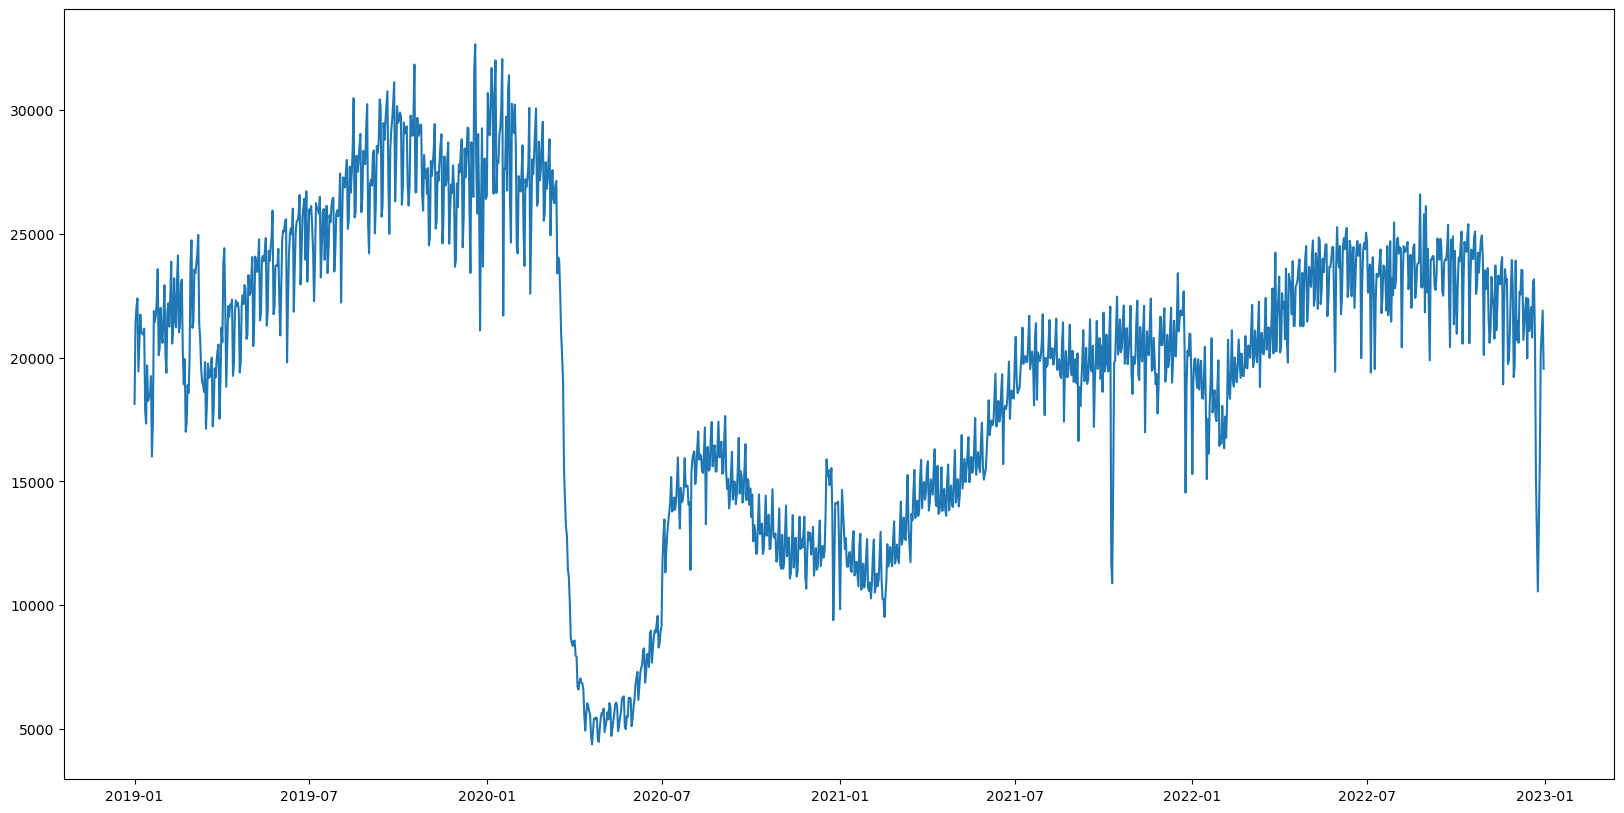

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(count_before['callsign'])
plt.show()

In [15]:
icaoO = pd.DataFrame()
icaoO['origin'] = icao['icao']
icaoO['Olatitude'] = icao['latitude']
icaoO['Olongitude'] = icao['longitude'] 

filtered_com_major_final = pd.merge(filtered_com_major, icaoO, on='origin', how='inner')

In [16]:
filtered_com_major_final

,callsign,typecode,origin,destination,firstseen,lastseen,day,Olatitude,Olongitude
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.1770
1,CXA825,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.1770
2,HVN55,B789,YSSY,EGLL,2018-12-31 04:37:28+00:00,2019-01-01 06:44:42+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.1770
3,BAW16,B77W,YSSY,EGLL,2018-12-31 05:50:41+00:00,2019-01-01 05:18:06+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.1770
4,QFA1,A388,YSSY,EGLL,2018-12-31 06:28:52+00:00,2019-01-01 06:03:57+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.1770
...,...,...,...,...,...,...,...,...,...
27108567,SKW5843,CRJ2,KCPR,KDEN,2022-12-31 15:03:40+00:00,2022-12-31 15:40:05+00:00,2022-12-31 00:00:00+00:00,42.9080,-106.4640
27108568,SKW4658,CRJ2,KCPR,KDEN,2022-12-31 20:47:17+00:00,2022-12-31 21:24:52+00:00,2022-12-31 00:00:00+00:00,42.9080,-106.4640
27108569,SKW5809,CRJ2,KCPR,KDEN,2022-12-31 22:31:01+00:00,2022-12-31 23:08:36+00:00,2022-12-31 00:00:00+00:00,42.9080,-106.4640
27108570,CVU90,DHC6,KSTK,KDEN,2022-12-27 17:48:08+00:00,2022-12-27 18:22:06+00:00,2022-12-27 00:00:00+00:00,40.6153,-103.2650


In [17]:
icaoD = pd.DataFrame()
icaoD['destination'] = icao['icao']
icaoD['Dlatitude'] = icao['latitude']
icaoD['Dlongitude'] = icao['longitude'] 

filtered_com_major_final = pd.merge(filtered_com_major_final, icaoD, on='destination', how='inner')

In [18]:
filtered_com_major_final

,callsign,typecode,origin,destination,firstseen,lastseen,day,Olatitude,Olongitude,Dlatitude,Dlongitude
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.1770,50.0333,8.57056
1,SIA26,A388,YSSY,EDDF,2019-01-02 05:19:34+00:00,2019-01-03 05:34:24+00:00,2019-01-03 00:00:00+00:00,-33.9461,151.1770,50.0333,8.57056
2,SIA26,A388,YSSY,EDDF,2019-01-03 05:29:15+00:00,2019-01-04 05:13:38+00:00,2019-01-04 00:00:00+00:00,-33.9461,151.1770,50.0333,8.57056
3,SIA26,A388,YSSY,EDDF,2019-01-04 05:23:35+00:00,2019-01-05 05:58:27+00:00,2019-01-05 00:00:00+00:00,-33.9461,151.1770,50.0333,8.57056
4,HVN37,B789,YSSY,EDDF,2019-01-05 04:38:41+00:00,2019-01-06 05:15:59+00:00,2019-01-06 00:00:00+00:00,-33.9461,151.1770,50.0333,8.57056
...,...,...,...,...,...,...,...,...,...,...,...
24088250,GOJUMP4,DHC6,KOKB,KOKB,2022-07-31 21:34:23+00:00,2022-07-31 21:56:17+00:00,2022-07-31 00:00:00+00:00,33.2173,-117.3540,33.2173,-117.35400
24088251,GOJUMP4,DHC6,KOKB,KOKB,2022-08-01 20:32:15+00:00,2022-08-01 20:47:10+00:00,2022-08-01 00:00:00+00:00,33.2173,-117.3540,33.2173,-117.35400
24088252,SKW405L,CRJ2,KMEI,KLUL,2022-10-03 21:33:17+00:00,2022-10-03 21:43:19+00:00,2022-10-03 00:00:00+00:00,32.3326,-88.7519,31.6726,-89.17220
24088253,SKW405L,CRJ2,KMEI,KLUL,2022-10-19 21:26:08+00:00,2022-10-19 21:37:29+00:00,2022-10-19 00:00:00+00:00,32.3326,-88.7519,31.6726,-89.17220


In [19]:
count_after = filtered_com_major_final.groupby('day').count()
count_after

,callsign,typecode,origin,destination,firstseen,lastseen,Olatitude,Olongitude,Dlatitude,Dlongitude
day,,,,,,,,,,
2019-01-01 00:00:00+00:00,14471,14471,14471,14471,14471,14471,14471,14471,14471,14471
2019-01-02 00:00:00+00:00,16955,16955,16955,16955,16955,16955,16955,16955,16955,16955
2019-01-03 00:00:00+00:00,17618,17618,17618,17618,17618,17618,17618,17618,17618,17618
2019-01-04 00:00:00+00:00,17989,17989,17989,17989,17989,17989,17989,17989,17989,17989
2019-01-05 00:00:00+00:00,15715,15715,15715,15715,15715,15715,15715,15715,15715,15715
...,...,...,...,...,...,...,...,...,...,...
2022-12-27 00:00:00+00:00,13765,13765,13765,13765,13765,13765,13765,13765,13765,13765
2022-12-28 00:00:00+00:00,17778,17778,17778,17778,17778,17778,17778,17778,17778,17778
2022-12-29 00:00:00+00:00,18448,18448,18448,18448,18448,18448,18448,18448,18448,18448


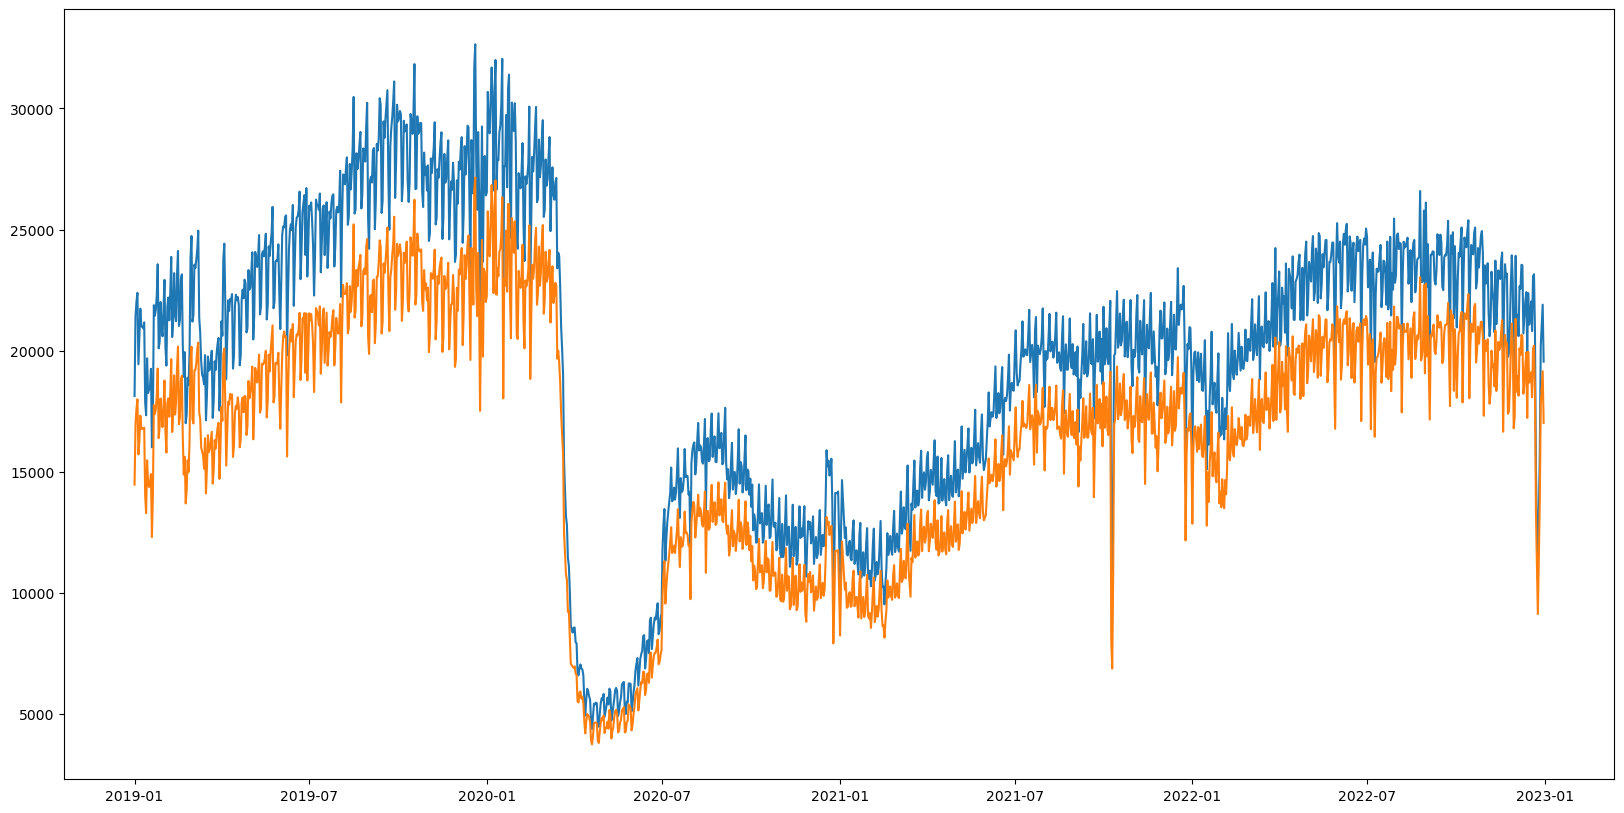

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(count_before['callsign'])
plt.plot(count_after['callsign'])
plt.show()

In [21]:

icao_set = set(icao['icao'])
destination_set = set(filtered_com_major['destination'])

# Calculate elements in row 0 not in row 1
dest_not_in_icao = destination_set.difference(icao_set)
dest_not_in_icao

{'YFDN',
 'AZ05',
 '6OK2',
 'SC06',
 'KI50',
 'II11',
 '0OH7',
 'KFKA',
 'FD77',
 'EBZH',
 'FA80',
 'LFQB',
 'SPAP',
 '9NJ8',
 'ID95',
 '6TS0',
 'K1O2',
 'MA97',
 '25SC',
 'XS05',
 'EGKE',
 'K7G0',
 '3AR6',
 '5MA9',
 'EBNM',
 '3WA1',
 '4IL3',
 '8IN2',
 'TN79',
 'UMMB',
 'FAOI',
 'IA54',
 '64IN',
 'KU08',
 'CA66',
 'KU77',
 'NZOM',
 '3CA7',
 'ESSN',
 '1FD4',
 'NY09',
 'CO86',
 'SSFJ',
 '56TS',
 '02ME',
 'K4B6',
 'CSF7',
 '13OH',
 '1GE4',
 '25TA',
 '12WA',
 'LOLM',
 'IA00',
 '5NK1',
 'II26',
 'CA17',
 '05CO',
 'LFGW',
 'OH27',
 'SN75',
 'MO14',
 '90OI',
 'SDTN',
 'K95F',
 '74CL',
 '1AL4',
 'ENHS',
 'K6J0',
 '1MU2',
 '63PA',
 'YBOG',
 '2NC8',
 'CO94',
 'OJ38',
 'EKFR',
 'OR52',
 '65TA',
 'NY11',
 'CKF6',
 'K2H2',
 'TX70',
 '08NY',
 'DE17',
 '34CN',
 'K48K',
 '4IN7',
 'KF84',
 'EBFN',
 '9IL7',
 '37CN',
 '6IL3',
 'OG04',
 'NJ64',
 'UWKI',
 '4NK2',
 'KCYO',
 'RKRN',
 'KCWV',
 '25GA',
 'IL57',
 'VA27',
 'VIBL',
 'EDAW',
 'IA11',
 'VA10',
 '2GA9',
 '8MD0',
 'SD83',
 'EDTQ',
 'CFM8',
 'SACA',
 

In [22]:
len(dest_not_in_icao)

8319

In [23]:
data_pop = pd.read_csv("PassengerNumber.csv")
data_pop['typecode'] = data_pop['Typecode']
data_pop = data_pop.drop('Typecode', axis=1)
data_pop

,Passenger Capacity,Before Covid,During Covid,After Covid,typecode
0,266,239,172,239,A306
1,312,280,202,280,A30B
2,220,198,143,198,A310
3,117,105,76,105,A318
4,134,120,87,120,A319
...,...,...,...,...,...
90,50,45,32,45,E145
91,80,72,52,72,E170
92,88,79,57,79,E175
93,114,102,74,102,E190


In [24]:
filtered_com_major_final_withpop = pd.merge(filtered_com_major_final, data_pop, on='typecode', how='inner')

In [25]:
filtered_com_major_final_withpop.head()

,callsign,typecode,origin,destination,firstseen,lastseen,day,Olatitude,Olongitude,Dlatitude,Dlongitude,Passenger Capacity,Before Covid,During Covid,After Covid
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.177,50.0333,8.57056,247,222,160,222
1,CES219,A332,YSSY,EDDF,2019-01-22 01:01:45+00:00,2019-01-23 04:47:23+00:00,2019-01-23 00:00:00+00:00,-33.9461,151.177,50.0333,8.57056,247,222,160,222
2,CCA577,A332,YSSY,EDDF,2021-09-08 07:29:26+00:00,2021-09-09 11:12:24+00:00,2021-09-09 00:00:00+00:00,-33.9461,151.177,50.0333,8.57056,247,222,160,222
3,CES7219,A332,YSSY,EDDF,2021-11-16 02:10:15+00:00,2021-11-17 10:57:27+00:00,2021-11-17 00:00:00+00:00,-33.9461,151.177,50.0333,8.57056,247,222,160,222
4,CES7219,A332,YSSY,EDDF,2022-01-24 02:55:56+00:00,2022-01-25 09:55:56+00:00,2022-01-25 00:00:00+00:00,-33.9461,151.177,50.0333,8.57056,247,222,160,222


In [26]:
filtered_com_major_final_withpop['pop'] = 0

In [27]:
filtered_com_major_final_withpop.head()

,callsign,typecode,origin,destination,firstseen,lastseen,day,Olatitude,Olongitude,Dlatitude,Dlongitude,Passenger Capacity,Before Covid,During Covid,After Covid,pop
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.177,50.0333,8.57056,247,222,160,222,0
1,CES219,A332,YSSY,EDDF,2019-01-22 01:01:45+00:00,2019-01-23 04:47:23+00:00,2019-01-23 00:00:00+00:00,-33.9461,151.177,50.0333,8.57056,247,222,160,222,0
2,CCA577,A332,YSSY,EDDF,2021-09-08 07:29:26+00:00,2021-09-09 11:12:24+00:00,2021-09-09 00:00:00+00:00,-33.9461,151.177,50.0333,8.57056,247,222,160,222,0
3,CES7219,A332,YSSY,EDDF,2021-11-16 02:10:15+00:00,2021-11-17 10:57:27+00:00,2021-11-17 00:00:00+00:00,-33.9461,151.177,50.0333,8.57056,247,222,160,222,0
4,CES7219,A332,YSSY,EDDF,2022-01-24 02:55:56+00:00,2022-01-25 09:55:56+00:00,2022-01-25 00:00:00+00:00,-33.9461,151.177,50.0333,8.57056,247,222,160,222,0


In [28]:
count_after_withpop = filtered_com_major_final_withpop.groupby('day').count()
count_after_withpop

,callsign,typecode,origin,destination,firstseen,lastseen,Olatitude,Olongitude,Dlatitude,Dlongitude,Passenger Capacity,Before Covid,During Covid,After Covid,pop
day,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,12986,12986,12986,12986,12986,12986,12986,12986,12986,12986,12986,12986,12986,12986,12986
2019-01-02 00:00:00+00:00,15192,15192,15192,15192,15192,15192,15192,15192,15192,15192,15192,15192,15192,15192,15192
2019-01-03 00:00:00+00:00,15890,15890,15890,15890,15890,15890,15890,15890,15890,15890,15890,15890,15890,15890,15890
2019-01-04 00:00:00+00:00,16110,16110,16110,16110,16110,16110,16110,16110,16110,16110,16110,16110,16110,16110,16110
2019-01-05 00:00:00+00:00,14152,14152,14152,14152,14152,14152,14152,14152,14152,14152,14152,14152,14152,14152,14152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27 00:00:00+00:00,12545,12545,12545,12545,12545,12545,12545,12545,12545,12545,12545,12545,12545,12545,12545
2022-12-28 00:00:00+00:00,16379,16379,16379,16379,16379,16379,16379,16379,16379,16379,16379,16379,16379,16379,16379
2022-12-29 00:00:00+00:00,17043,17043,17043,17043,17043,17043,17043,17043,17043,17043,17043,17043,17043,17043,17043


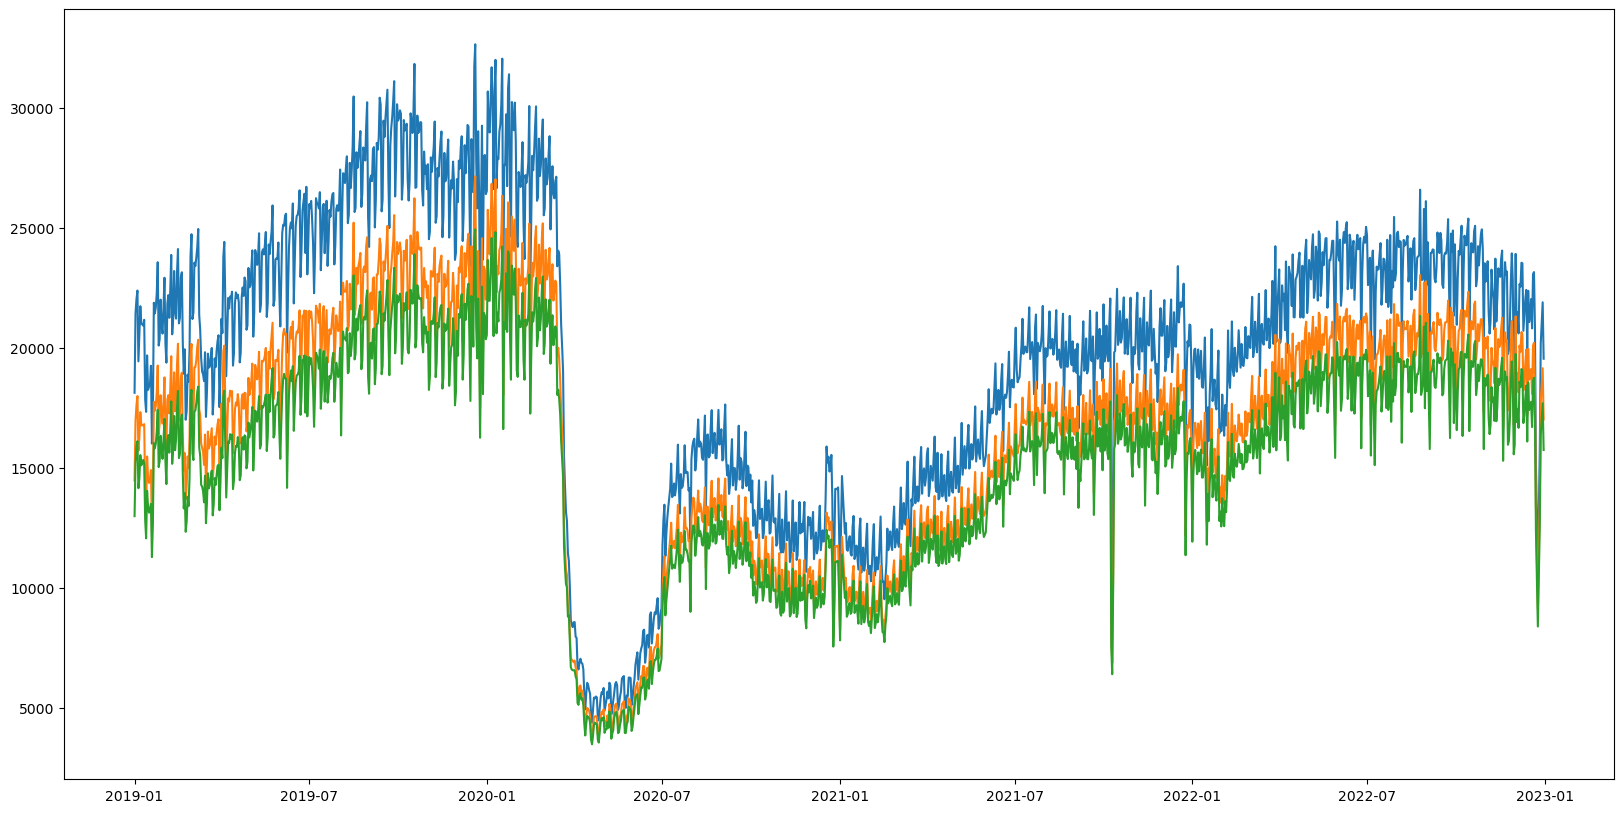

In [30]:
plt.figure(figsize=(20, 10))
plt.plot(count_before['callsign'])
plt.plot(count_after['callsign'])
plt.plot(count_after_withpop['callsign'])
plt.show()

In [32]:
filtered_com_major_final_withpop.dtypes

callsign                           object
typecode                           object
origin                             object
destination                        object
firstseen                          object
lastseen                           object
day                   datetime64[ns, UTC]
Olatitude                         float64
Olongitude                        float64
Dlatitude                         float64
Dlongitude                        float64
Passenger Capacity                  int64
Before Covid                        int64
During Covid                        int64
After Covid                         int64
pop                                 int64
dtype: object

In [33]:
cutoff_date_before = pd.to_datetime('2020-01-01')
cutoff_date_before

Timestamp('2020-01-01 00:00:00')

In [37]:
cutoff_date_before = pd.to_datetime('2020-01-01', utc = True)
filtered_com_major_final_withpop_before = filtered_com_major_final_withpop[filtered_com_major_final_withpop['day'] < cutoff_date_before]
filtered_com_major_final_withpop_before_ts = filtered_com_major_final_withpop_before.groupby('day')['Before Covid'].sum()
filtered_com_major_final_withpop_before_ts

day
2019-01-01 00:00:00+00:00    2345857
2019-01-02 00:00:00+00:00    2699299
2019-01-03 00:00:00+00:00    2847235
2019-01-04 00:00:00+00:00    2888981
2019-01-05 00:00:00+00:00    2561017
                              ...   
2019-12-27 00:00:00+00:00    3815215
2019-12-28 00:00:00+00:00    2945116
2019-12-29 00:00:00+00:00    3621849
2019-12-30 00:00:00+00:00    3600757
2019-12-31 00:00:00+00:00    3481904
Name: Before Covid, Length: 365, dtype: int64

In [50]:
cutoff_date_start = pd.to_datetime('2020-03-25', utc = True)
cutoff_date_during = pd.to_datetime('2022-01-01', utc = True)
filtered_com_major_final_withpop_during = filtered_com_major_final_withpop[(filtered_com_major_final_withpop['day'] > cutoff_date_start) & (filtered_com_major_final_withpop['day'] < cutoff_date_during)]
filtered_com_major_final_withpop_during_ts = filtered_com_major_final_withpop_during.groupby('day')['During Covid'].sum()
filtered_com_major_final_withpop_during_ts

day
2020-03-26 00:00:00+00:00    1083752
2020-03-27 00:00:00+00:00     955865
2020-03-28 00:00:00+00:00     836226
2020-03-29 00:00:00+00:00     805522
2020-03-30 00:00:00+00:00     787440
                              ...   
2021-12-27 00:00:00+00:00    1825908
2021-12-28 00:00:00+00:00    1840596
2021-12-29 00:00:00+00:00    1898239
2021-12-30 00:00:00+00:00    1951169
2021-12-31 00:00:00+00:00    1808788
Name: During Covid, Length: 643, dtype: int64

In [42]:
filtered_com_major_final_withpop_after = filtered_com_major_final_withpop[filtered_com_major_final_withpop['day'] >= cutoff_date_during]
filtered_com_major_final_withpop_after_ts = filtered_com_major_final_withpop_after.groupby('day')['After Covid'].sum()
filtered_com_major_final_withpop_after_ts

day
2022-01-01 00:00:00+00:00    2029891
2022-01-02 00:00:00+00:00    2395303
2022-01-03 00:00:00+00:00    2553924
2022-01-04 00:00:00+00:00    2633319
2022-01-05 00:00:00+00:00    2573020
                              ...   
2022-12-27 00:00:00+00:00    2002244
2022-12-28 00:00:00+00:00    2743934
2022-12-29 00:00:00+00:00    2869106
2022-12-30 00:00:00+00:00    2960106
2022-12-31 00:00:00+00:00    2665107
Name: After Covid, Length: 365, dtype: int64

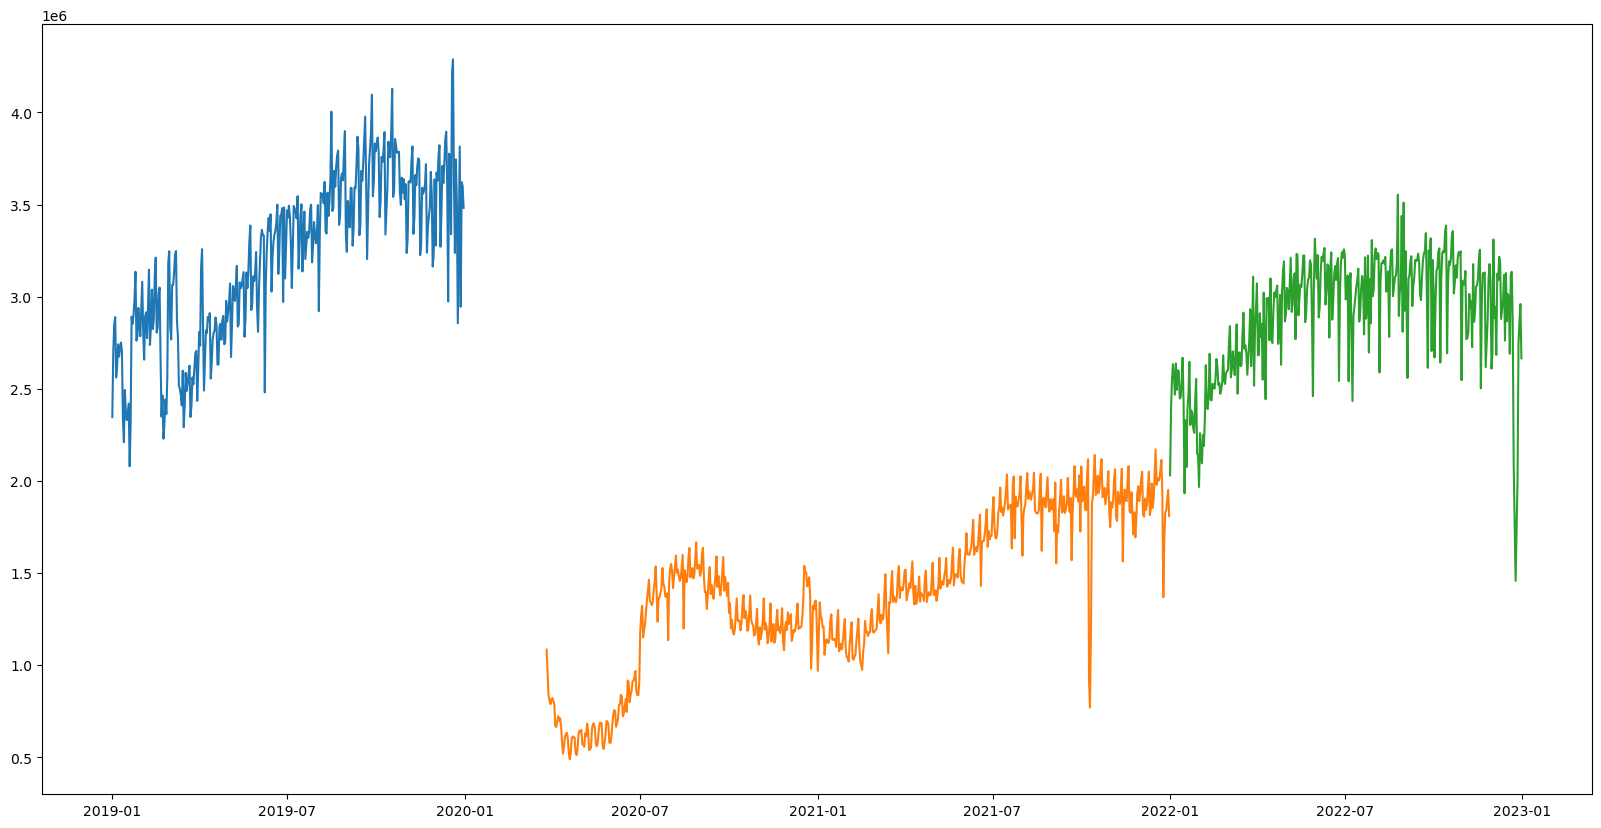

In [51]:
plt.figure(figsize=(20, 10))
plt.plot(filtered_com_major_final_withpop_before_ts)
plt.plot(filtered_com_major_final_withpop_during_ts)
plt.plot(filtered_com_major_final_withpop_after_ts)
plt.show()

In [58]:
before=pd.DataFrame(filtered_com_major_final_withpop_before_ts)
before

,Before Covid
day,
2019-01-01 00:00:00+00:00,2345857
2019-01-02 00:00:00+00:00,2699299
2019-01-03 00:00:00+00:00,2847235
2019-01-04 00:00:00+00:00,2888981
2019-01-05 00:00:00+00:00,2561017
...,...
2019-12-27 00:00:00+00:00,3815215
2019-12-28 00:00:00+00:00,2945116
2019-12-29 00:00:00+00:00,3621849


In [59]:
during=pd.DataFrame(filtered_com_major_final_withpop_during_ts)
during

,During Covid
day,
2020-03-26 00:00:00+00:00,1083752
2020-03-27 00:00:00+00:00,955865
2020-03-28 00:00:00+00:00,836226
2020-03-29 00:00:00+00:00,805522
2020-03-30 00:00:00+00:00,787440
...,...
2021-12-27 00:00:00+00:00,1825908
2021-12-28 00:00:00+00:00,1840596
2021-12-29 00:00:00+00:00,1898239


In [60]:
after=pd.DataFrame(filtered_com_major_final_withpop_after_ts)
after

,After Covid
day,
2022-01-01 00:00:00+00:00,2029891
2022-01-02 00:00:00+00:00,2395303
2022-01-03 00:00:00+00:00,2553924
2022-01-04 00:00:00+00:00,2633319
2022-01-05 00:00:00+00:00,2573020
...,...
2022-12-27 00:00:00+00:00,2002244
2022-12-28 00:00:00+00:00,2743934
2022-12-29 00:00:00+00:00,2869106


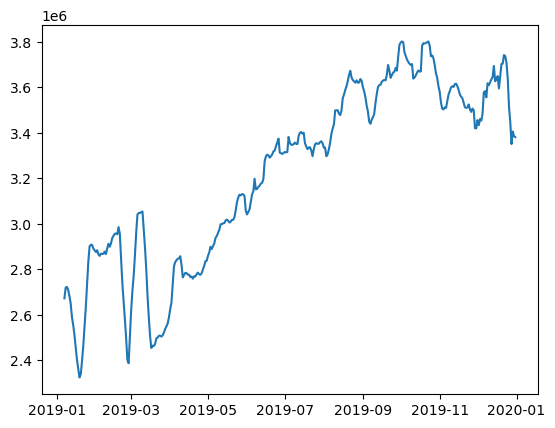

In [62]:
plt.plot(before.rolling(window = 7).mean());

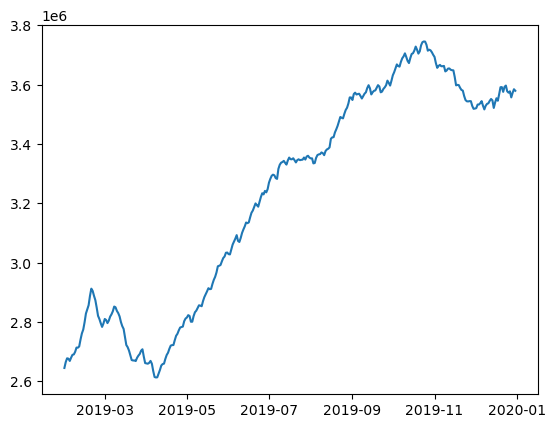

In [68]:
plt.plot(before.rolling(window = 30).mean());

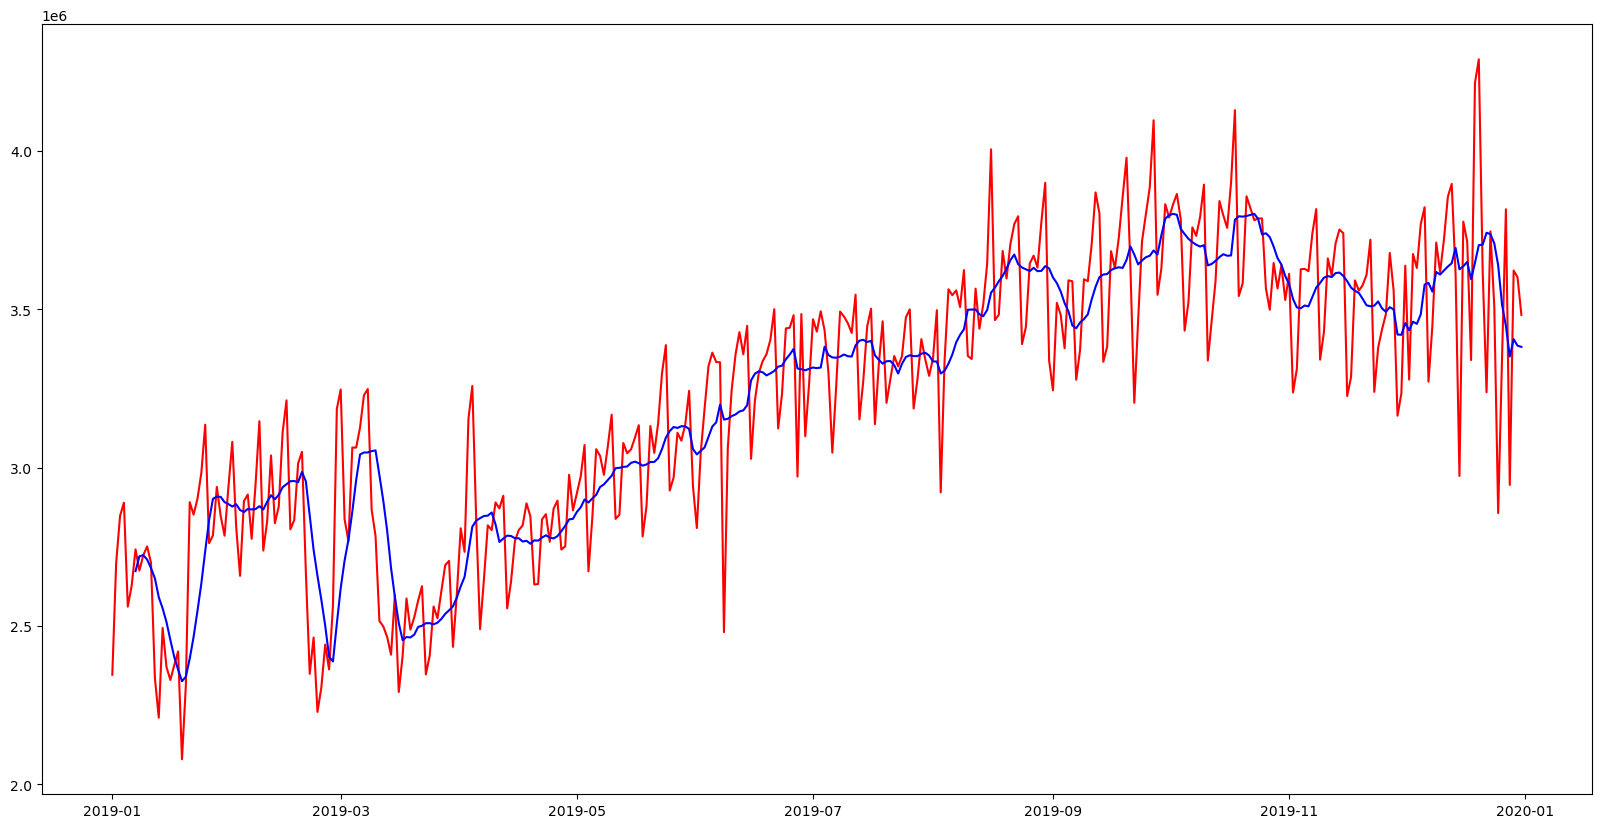

In [79]:
plt.figure(figsize = (20,10))
plt.plot(before.index,before['Before Covid'], label = 'count', color = 'red')
plt.plot(before.index,before['Before Covid'].rolling(window = 7).mean(), label = 'count', color = 'blue');

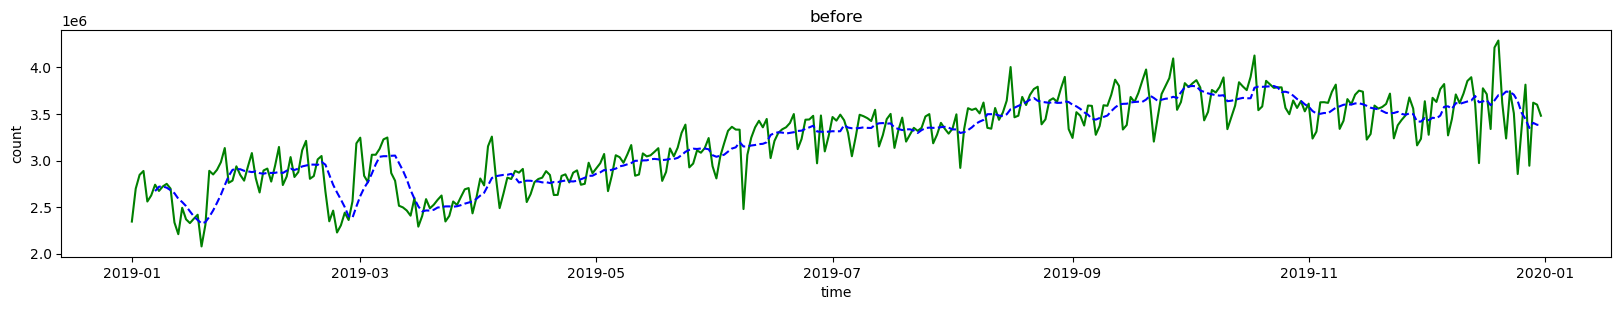

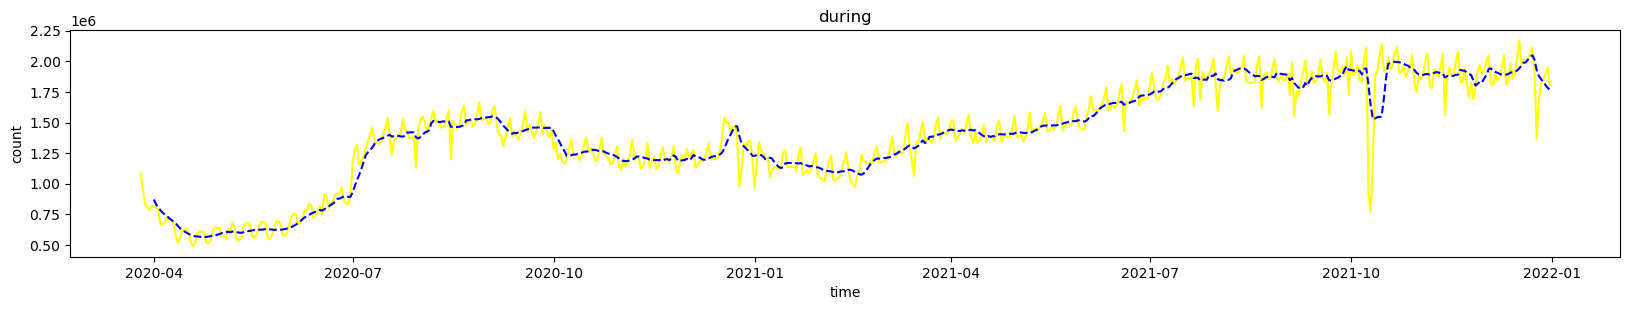

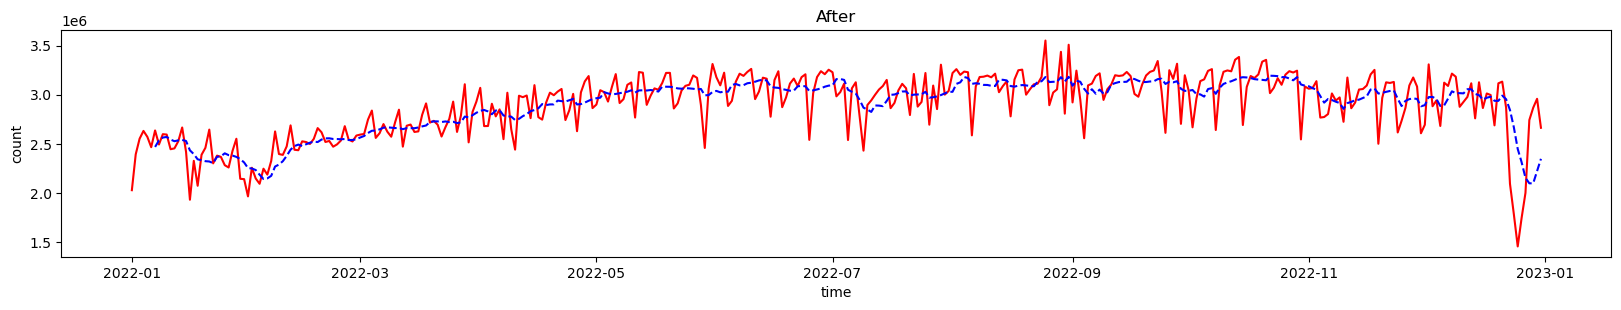

In [77]:
xTime = before.index

yGreen = before['Before Covid']

plt.figure(figsize = (20,10))
plt.subplot(311)
plt.title('before')
plt.xlabel('time')
plt.ylabel('count')
beforedata = plt.plot(xTime,yGreen, label = 'Green', color = 'green')
beforetime = plt.plot(xTime,yGreen.rolling(window = 7).mean(), label='Green Mean', linestyle='--',color='blue')

xTime = during.index
yGreen = during['During Covid']
plt.figure(figsize = (20,10))
plt.subplot(312)
plt.title('during')
plt.xlabel('time')
plt.ylabel('count')
yellow_data_line = plt.plot(xTime,yGreen, label = 'Yellow', color = 'yellow')
yellow_mean_line = plt.plot(xTime,yGreen.rolling(window = 7).mean(), label='Yellow Mean', linestyle='--',color='blue')


xTime = after.index
yGreen = after['After Covid']
plt.figure(figsize = (20,10))
plt.subplot(313)
plt.title('After')
plt.xlabel('time')
plt.ylabel('count')
yellow_data_line = plt.plot(xTime,yGreen, label = 'Red', color = 'red')
yellow_mean_line = plt.plot(xTime,yGreen.rolling(window = 7).mean(), label='Yellow Mean', linestyle='--',color='blue')
plt.show()

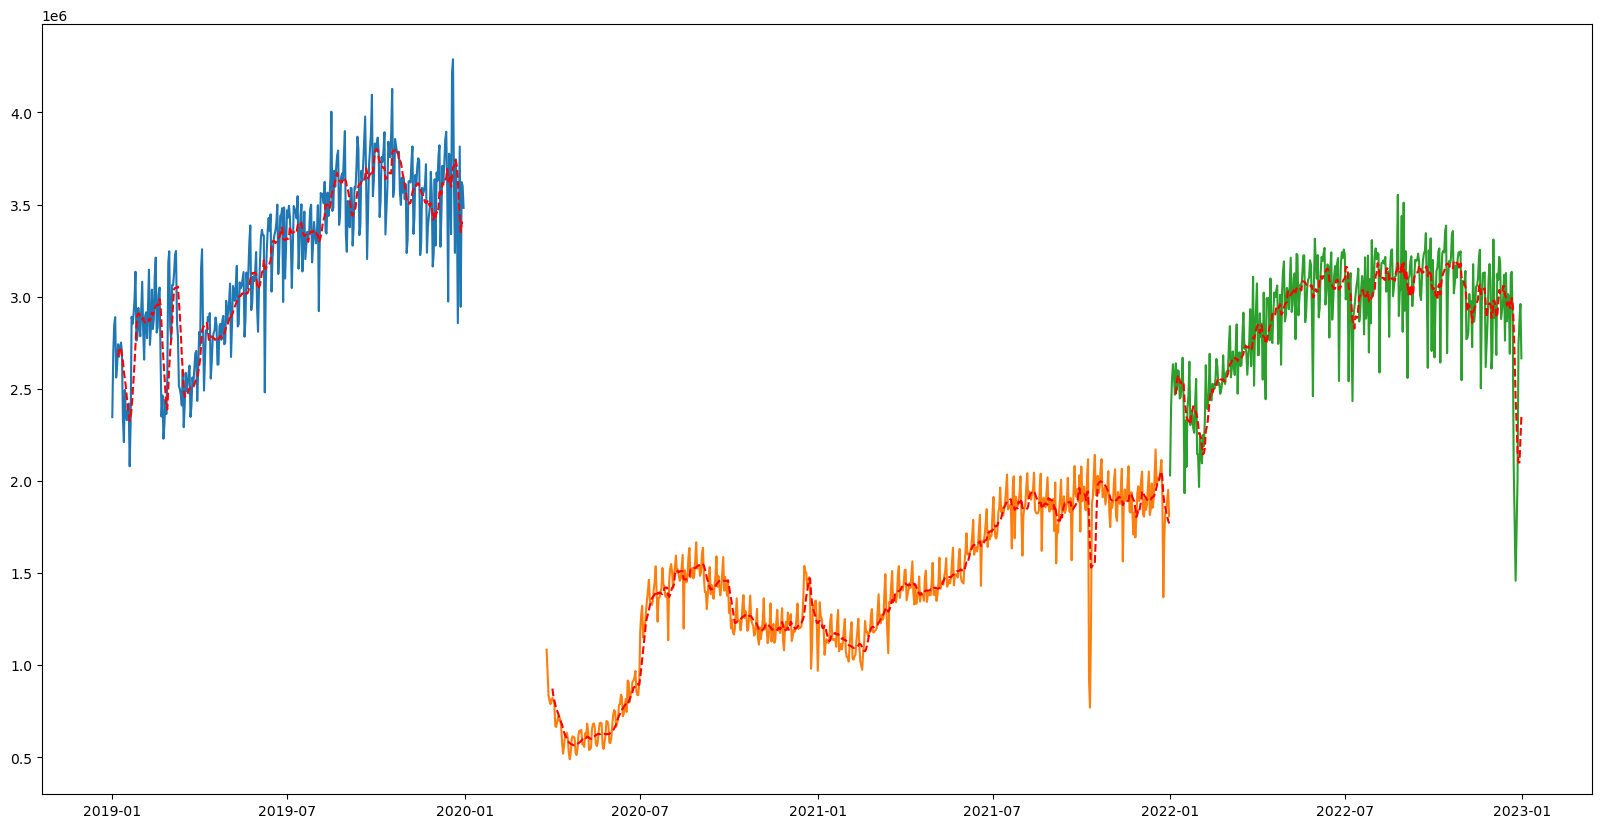

In [81]:
plt.figure(figsize=(20, 10))
plt.plot(filtered_com_major_final_withpop_before_ts)
plt.plot(filtered_com_major_final_withpop_during_ts)
plt.plot(filtered_com_major_final_withpop_after_ts)
plt.plot(before.index,before['Before Covid'].rolling(window = 7).mean(), label='Green Mean', linestyle='--',color='red')
plt.plot(during.index,during['During Covid'].rolling(window = 7).mean(), label='Green Mean', linestyle='--',color='red')
plt.plot(after.index,after['After Covid'].rolling(window = 7).mean(), label='Green Mean', linestyle='--',color='red')
plt.show()

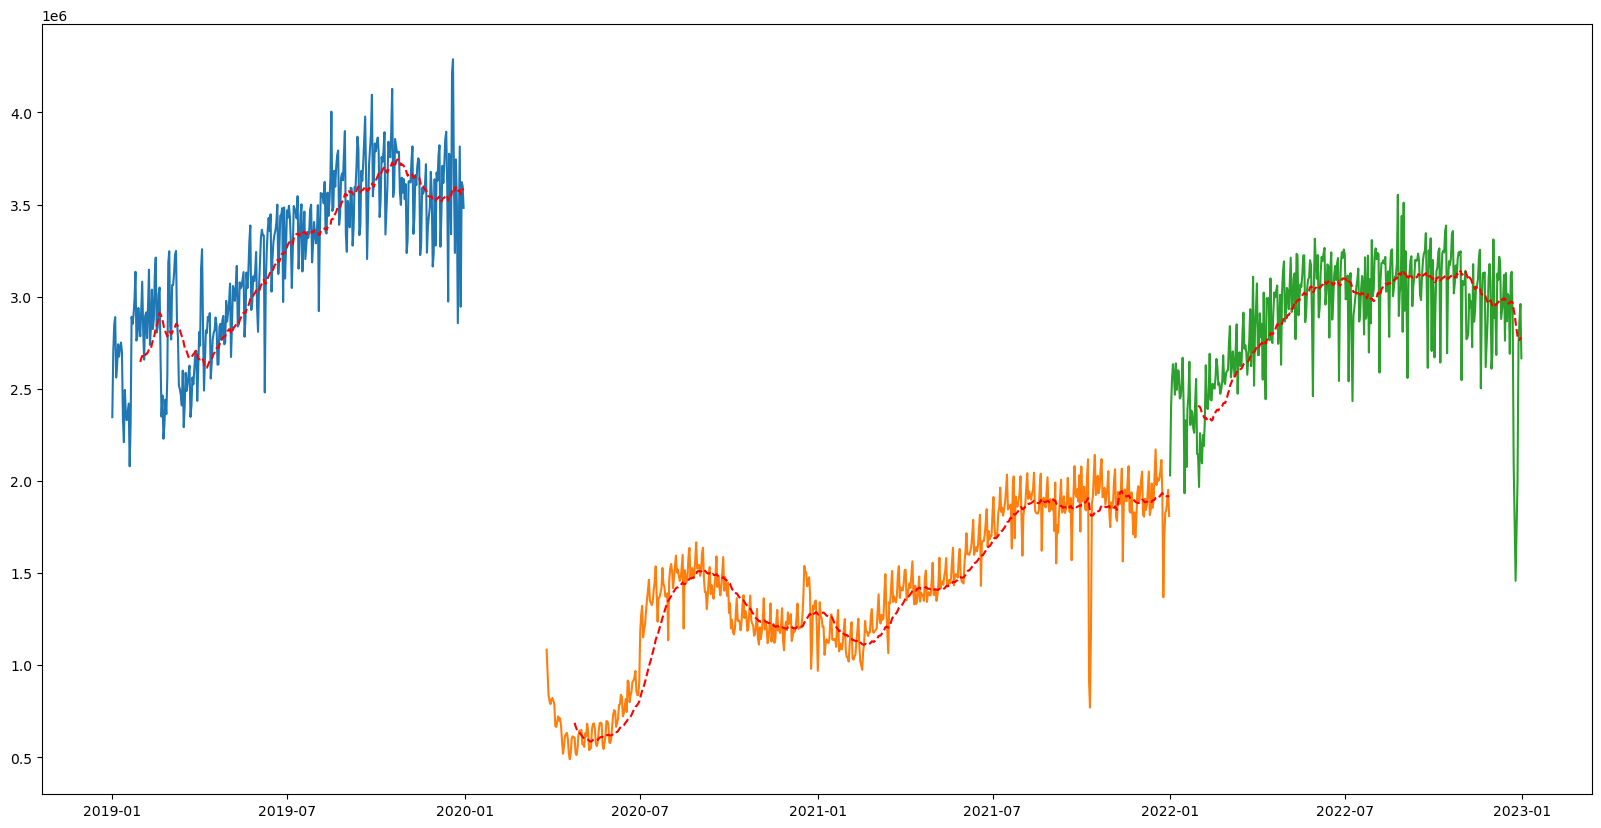

In [82]:
plt.figure(figsize=(20, 10))
plt.plot(filtered_com_major_final_withpop_before_ts)
plt.plot(filtered_com_major_final_withpop_during_ts)
plt.plot(filtered_com_major_final_withpop_after_ts)
plt.plot(before.index,before['Before Covid'].rolling(window = 30).mean(), label='Green Mean', linestyle='--',color='red')
plt.plot(during.index,during['During Covid'].rolling(window = 30).mean(), label='Green Mean', linestyle='--',color='red')
plt.plot(after.index,after['After Covid'].rolling(window = 30).mean(), label='Green Mean', linestyle='--',color='red')
plt.show()

In [84]:
before.dtypes

Before Covid    int64
dtype: object

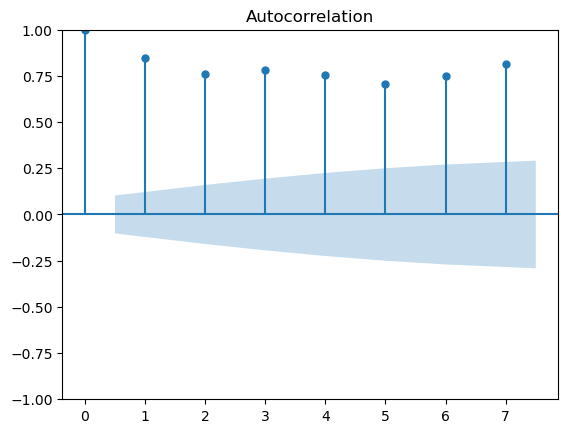

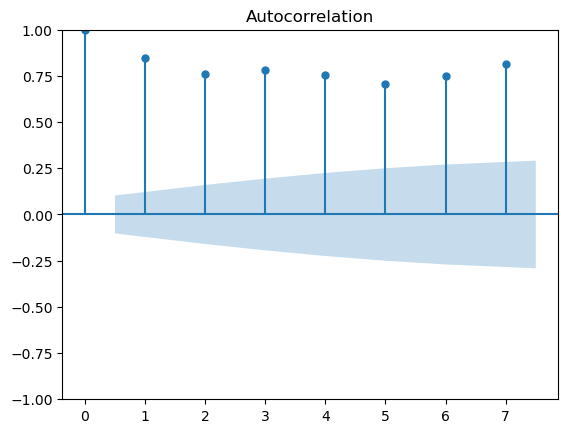

In [87]:
plot_acf(before['Before Covid'], lags = 7)

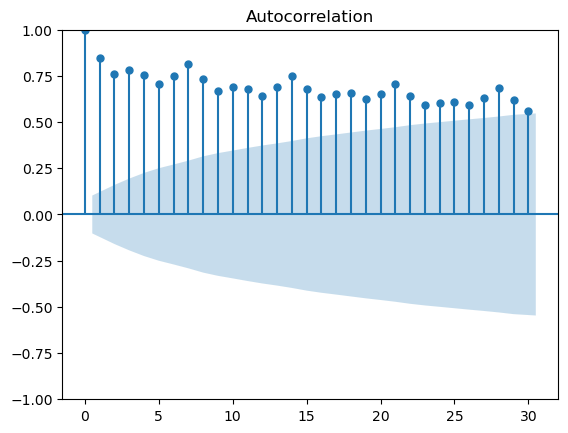

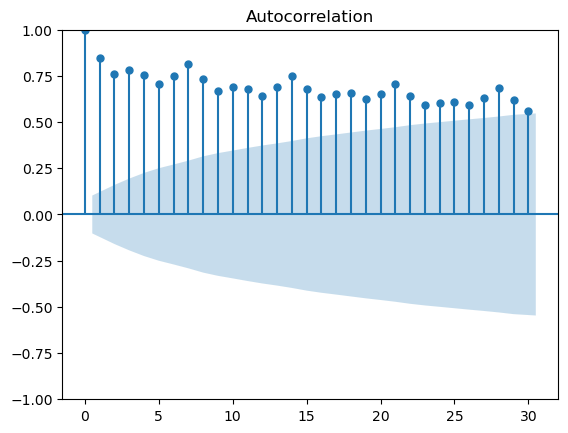

In [88]:
plot_acf(before['Before Covid'], lags = 30)

In [91]:
before.reset_index(inplace=True)
during.reset_index(inplace=True)
after.reset_index(inplace=True)
before

,index,day,Before Covid
0,0,2019-01-01 00:00:00+00:00,2345857
1,1,2019-01-02 00:00:00+00:00,2699299
2,2,2019-01-03 00:00:00+00:00,2847235
3,3,2019-01-04 00:00:00+00:00,2888981
4,4,2019-01-05 00:00:00+00:00,2561017
...,...,...,...
360,360,2019-12-27 00:00:00+00:00,3815215
361,361,2019-12-28 00:00:00+00:00,2945116
362,362,2019-12-29 00:00:00+00:00,3621849
363,363,2019-12-30 00:00:00+00:00,3600757


In [92]:
lm=sm.OLS(before['Before Covid'],sm.add_constant(before.index)).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Before Covid   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     695.6
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           2.23e-86
Time:                        21:07:12   Log-Likelihood:                -5064.6
No. Observations:                 365   AIC:                         1.013e+04
Df Residuals:                     363   BIC:                         1.014e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         2.6e+06   2.69e+04     96.571      0.0

In [93]:
lm=sm.OLS(during['During Covid'],sm.add_constant(during.index)).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:           During Covid   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1530.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          6.06e-172
Time:                        21:07:39   Log-Likelihood:                -8831.2
No. Observations:                 643   AIC:                         1.767e+04
Df Residuals:                     641   BIC:                         1.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.065e+05   1.76e+04     45.808      0.0

In [94]:
lm=sm.OLS(after['After Covid'],sm.add_constant(after.index)).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:            After Covid   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     98.12
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.24e-20
Time:                        21:07:54   Log-Likelihood:                -5108.1
No. Observations:                 365   AIC:                         1.022e+04
Df Residuals:                     363   BIC:                         1.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.631e+06   3.03e+04     86.739      0.0

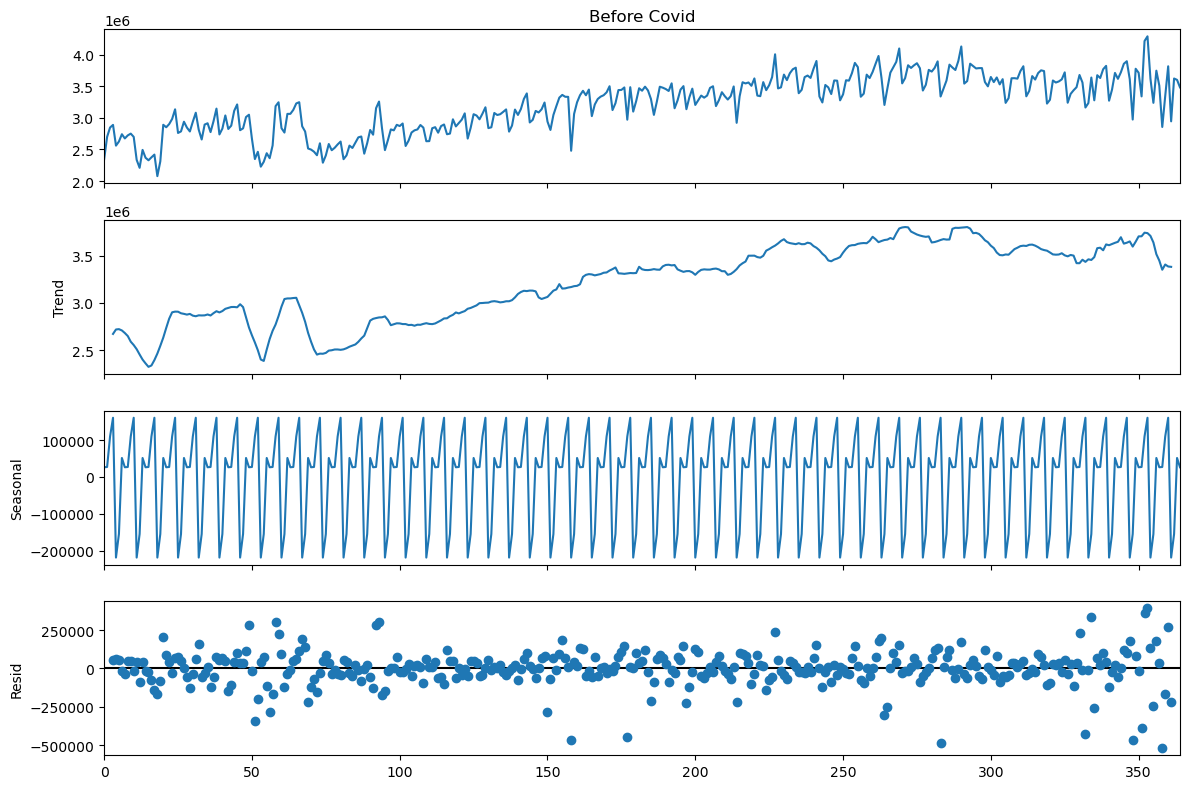

In [97]:
matplotlib.rcParams['figure.figsize'] = [12, 8]
res = sm.tsa.seasonal_decompose(before['Before Covid'],model='additive',period=7)
res.plot()
plt.show()

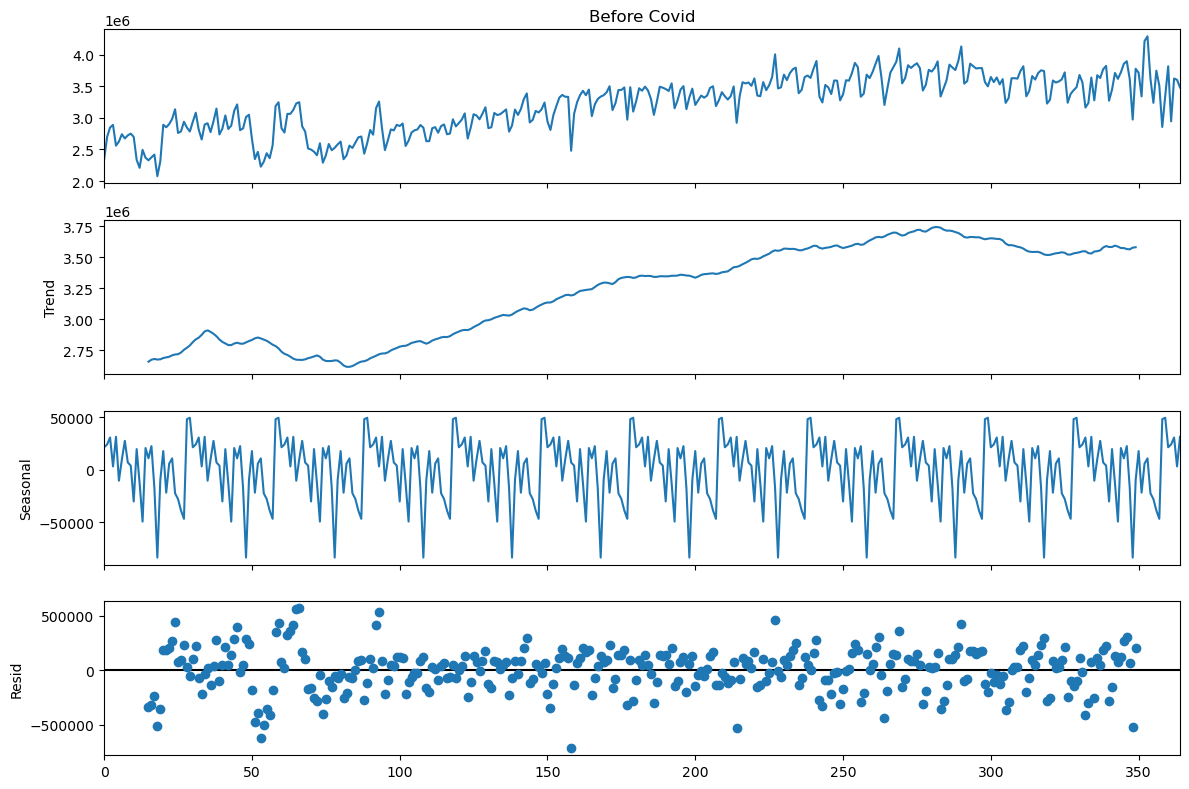

In [98]:
matplotlib.rcParams['figure.figsize'] = [12, 8]
res = sm.tsa.seasonal_decompose(before['Before Covid'],model='additive',period=30)
res.plot()
plt.show()

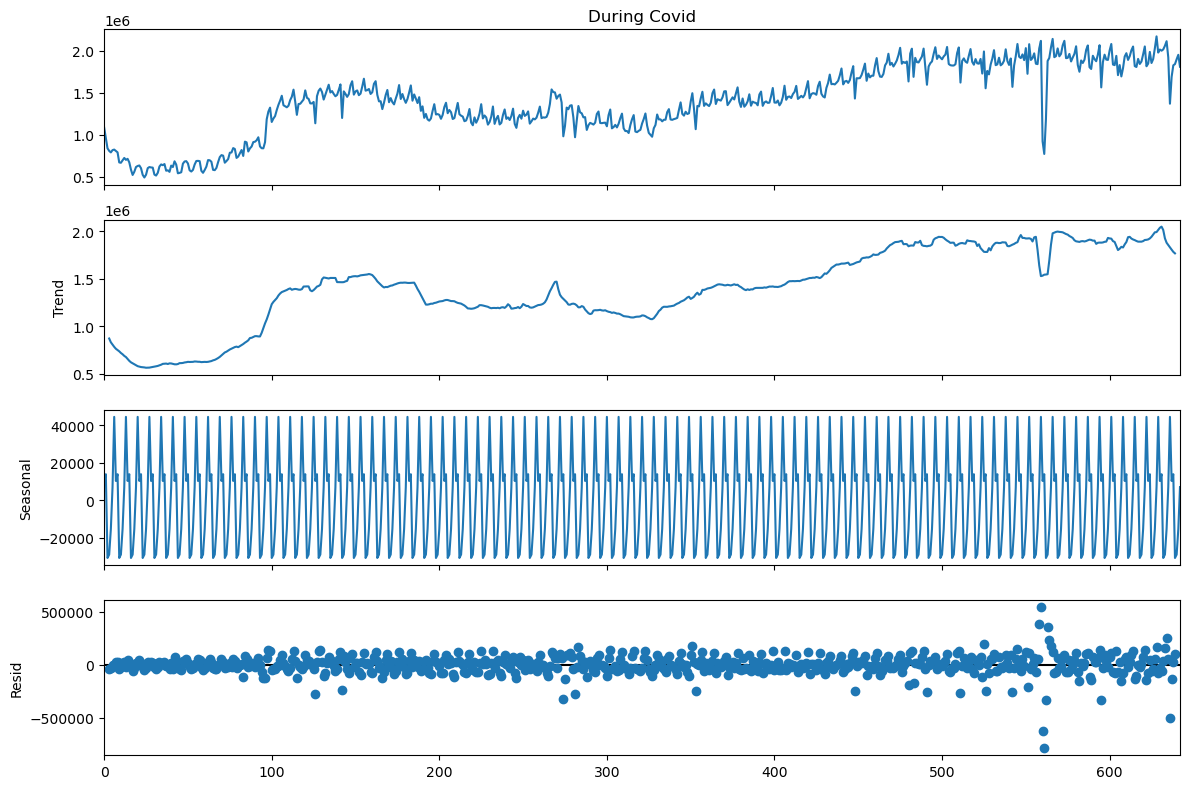

In [99]:
matplotlib.rcParams['figure.figsize'] = [12, 8]
res = sm.tsa.seasonal_decompose(during['During Covid'],model='additive',period=7)
res.plot()
plt.show()

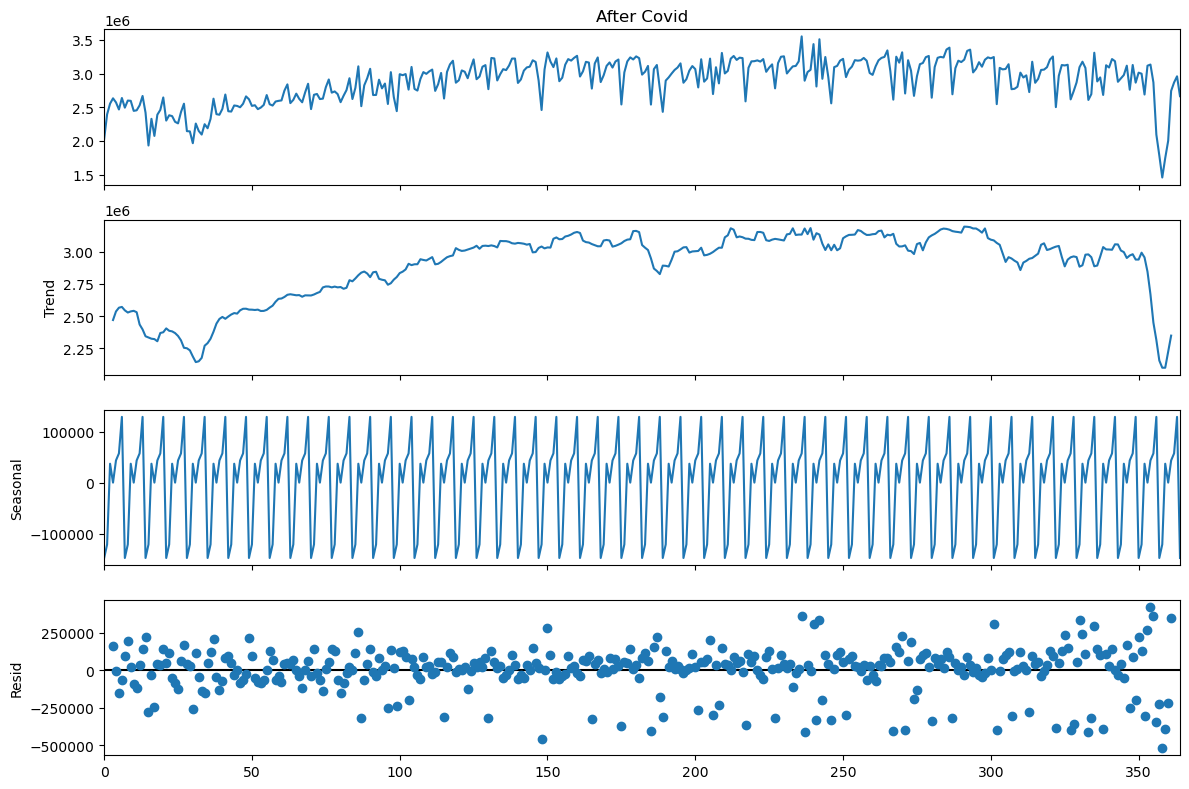

In [103]:
matplotlib.rcParams['figure.figsize'] = [12, 8]
res = sm.tsa.seasonal_decompose(after['After Covid'],model='additive',period=7)
res.plot()
plt.show()

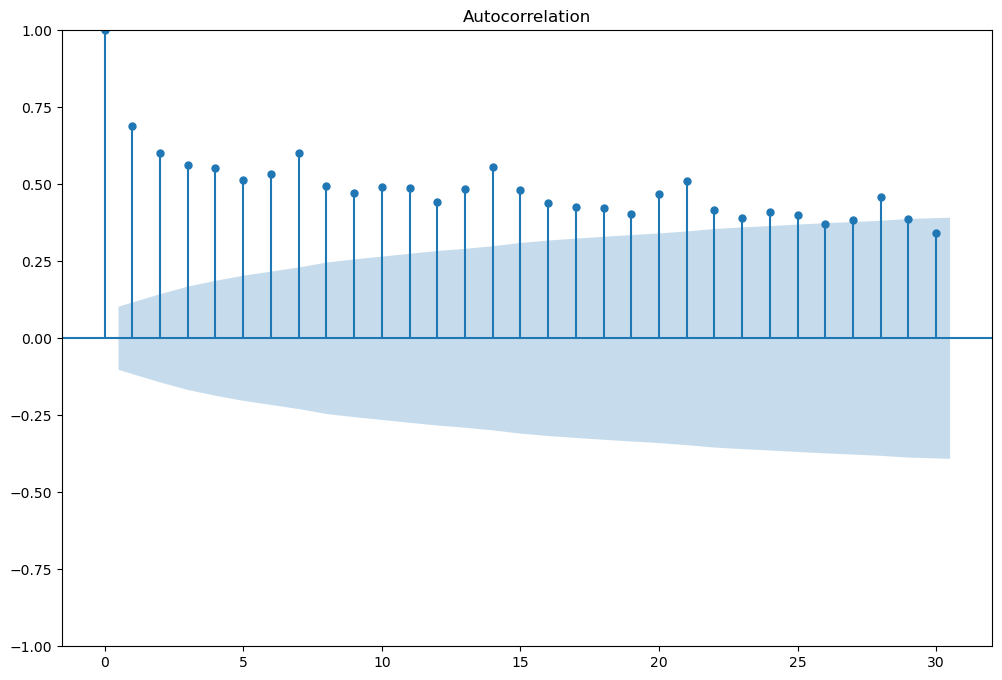

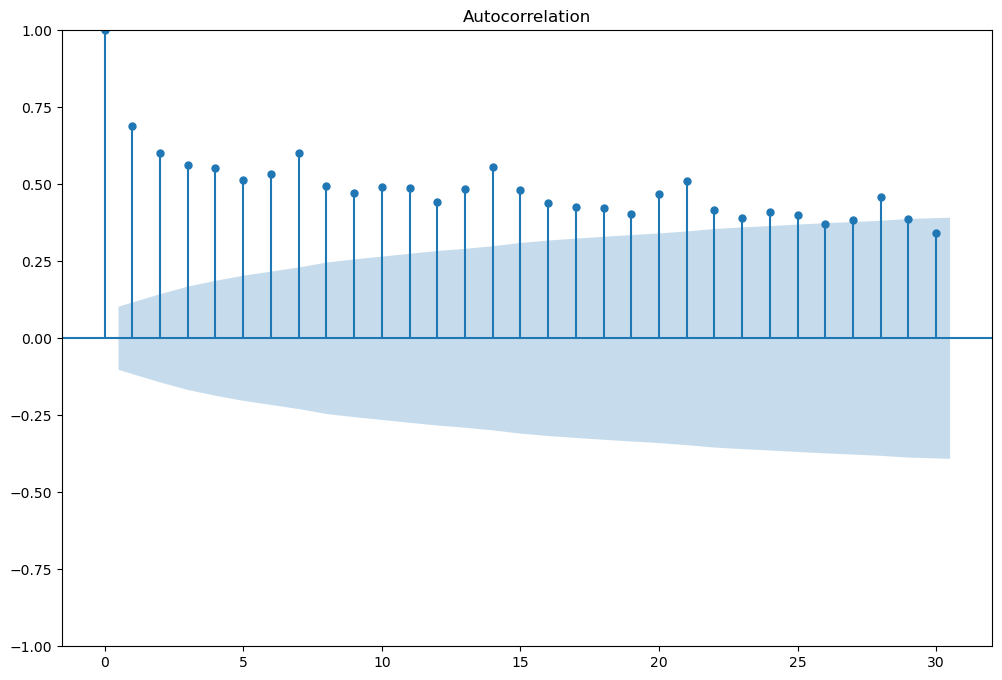

In [105]:
plot_acf(after['After Covid'], lags = 30)

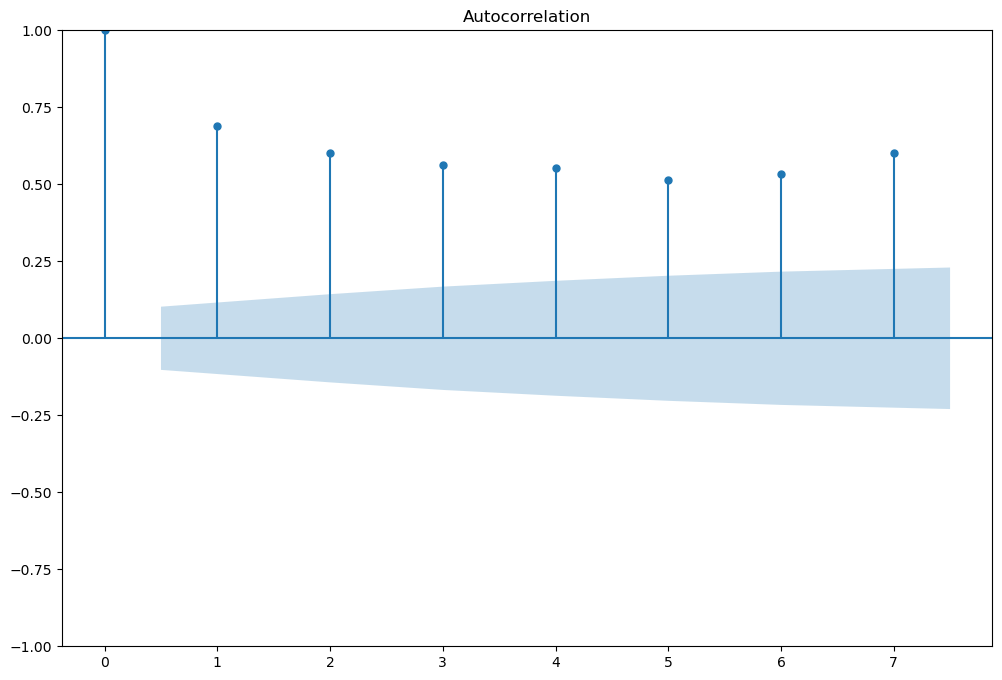

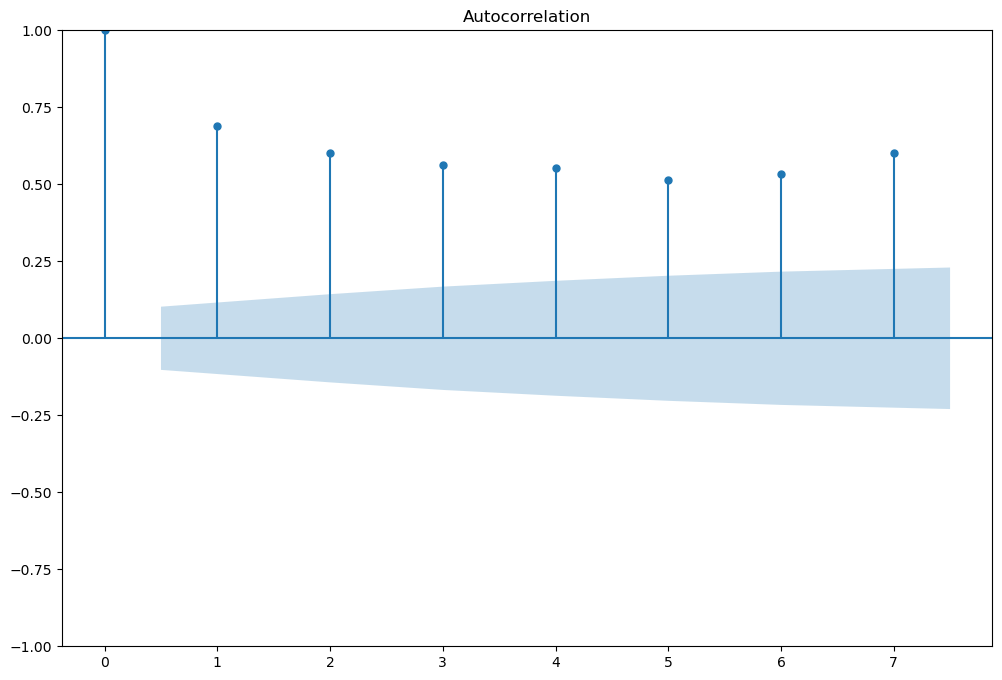

In [106]:
plot_acf(after['After Covid'], lags = 7)